# #Data Loading and Exploration.

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from numpy.linalg import eig
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from pandas import read_csv

In [143]:
#Load the CSV File
sales = pd.read_csv('sales_data_sample.csv', encoding = "ISO-8859-1", engine='python')

In [144]:
# Display a sample of five rows of the data frame
sales.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [145]:
# Check the shape of the data (number of rows and columns). 
sales.shape

(2823, 25)

In [146]:
#Check the general information about the dataframe using the .info() method.
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [147]:
# Check the missing Values
sales.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [148]:
#Percentage of missing values
(sales.isnull().sum()*100/sales.isnull().count())

ORDERNUMBER          0.000000
QUANTITYORDERED      0.000000
PRICEEACH            0.000000
ORDERLINENUMBER      0.000000
SALES                0.000000
ORDERDATE            0.000000
STATUS               0.000000
QTR_ID               0.000000
MONTH_ID             0.000000
YEAR_ID              0.000000
PRODUCTLINE          0.000000
MSRP                 0.000000
PRODUCTCODE          0.000000
CUSTOMERNAME         0.000000
PHONE                0.000000
ADDRESSLINE1         0.000000
ADDRESSLINE2        89.302161
CITY                 0.000000
STATE               52.639036
POSTALCODE           2.692171
COUNTRY              0.000000
TERRITORY           38.044633
CONTACTLASTNAME      0.000000
CONTACTFIRSTNAME     0.000000
DEALSIZE             0.000000
dtype: float64

In [149]:
#Drop the missing values if there are any
sales = sales.dropna(subset =['ADDRESSLINE2', 'STATE' ,'TERRITORY' ,'POSTALCODE'])

In [150]:
sales.shape

(147, 25)

In [151]:
#  Check if there are any duplicate rows
sales["is_duplicate"]= sales.duplicated()
sales

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,is_duplicate
10,10223,37,100.00,1,3965.66,2/20/2004 0:00,Shipped,1,2,2004,...,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium,False
21,10361,20,72.55,13,1451.00,12/17/2004 0:00,Shipped,4,12,2004,...,Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Small,False
40,10270,21,100.00,9,4905.39,7/19/2004 0:00,Shipped,3,7,2004,...,Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Medium,False
47,10347,30,100.00,1,3944.70,11/29/2004 0:00,Shipped,4,11,2004,...,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium,False
51,10391,24,100.00,4,2416.56,3/9/2005 0:00,Shipped,1,3,2005,...,Level 15,North Sydney,NSW,2060,Australia,APAC,O'Hara,Anna,Small,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,10120,43,76.00,14,3268.00,4/29/2003 0:00,Shipped,2,4,2003,...,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium,False
2673,10223,26,67.20,15,1747.20,2/20/2004 0:00,Shipped,1,2,2004,...,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Small,False
2685,10361,44,100.00,10,5001.92,12/17/2004 0:00,Shipped,4,12,2004,...,Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Medium,False
2764,10361,35,100.00,11,4277.35,12/17/2004 0:00,Shipped,4,12,2004,...,Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Medium,False


In [152]:
#  Write a function that will impute missing values of the columns “STATE”,“POSTALCODE”,“TERRITORY” with its most occurring label.
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(sales)
imputed_train_df = imp_mean.transform(sales)

In [153]:
sales.shape

(147, 26)

In [154]:
# Drop “ADDRESSLINE2”,”ORDERDATE”,”PHONE” column.
sales = sales.drop(['ADDRESSLINE2','ORDERDATE','PHONE'],axis=1)

In [155]:
sales.shape

(147, 23)

In [156]:
sales.head(2)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,is_duplicate
10,10223,37,100.00,1,3965.66,Shipped,1,2,2004,Motorcycles,...,636 St Kilda Road,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium,False
21,10361,20,72.55,13,1451.00,Shipped,4,12,2004,Motorcycles,...,"Monitor Money Building, 815 Pacific Hwy",Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Small,False


In [157]:
# Convert the labels of the STATUS column to 0 and 1. For Shipped assign value 1 and for all other labels (i.e. ‘Canceled’,’ Resolved’,’ On Hold’,’ In Process’, 'Disputed') assign 0. Note we will consider everything apart from Shipped as cancel (i.e. 0).
sales['STATUS']=sales['STATUS'].replace({'Canceled' :0 ,'Resolved':0 ,'On Hold':0 ,'In Process':0 , 'Disputed': 0, 'Shipped': 1})

In [158]:
sales.head(50)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,is_duplicate
10,10223,37,100.00,1,3965.66,1,1,2,2004,Motorcycles,...,636 St Kilda Road,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium,False
21,10361,20,72.55,13,1451.00,1,4,12,2004,Motorcycles,...,"Monitor Money Building, 815 Pacific Hwy",Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Small,False
40,10270,21,100.00,9,4905.39,1,3,7,2004,Classic Cars,...,"Monitor Money Building, 815 Pacific Hwy",Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Medium,False
47,10347,30,100.00,1,3944.70,1,4,11,2004,Classic Cars,...,636 St Kilda Road,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium,False
51,10391,24,100.00,4,2416.56,1,1,3,2005,Classic Cars,...,201 Miller Street,North Sydney,NSW,2060,Australia,APAC,O'Hara,Anna,Small,False
55,10120,29,96.34,3,2793.86,1,2,4,2003,Motorcycles,...,636 St Kilda Road,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Small,False
64,10223,47,100.00,4,5422.39,1,1,2,2004,Motorcycles,...,636 St Kilda Road,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium,False
75,10361,26,51.15,8,1329.90,1,4,12,2004,Motorcycles,...,"Monitor Money Building, 815 Pacific Hwy",Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Small,False
81,10120,46,100.00,2,9264.86,1,2,4,2003,Motorcycles,...,636 St Kilda Road,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Large,False
90,10223,49,100.00,3,9774.03,1,1,2,2004,Motorcycles,...,636 St Kilda Road,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Large,False


In [159]:
#Assign ‘STATUS’ column into a label variable .
df_status = sales['STATUS']

In [160]:
sales

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,is_duplicate
10,10223,37,100.00,1,3965.66,1,1,2,2004,Motorcycles,...,636 St Kilda Road,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium,False
21,10361,20,72.55,13,1451.00,1,4,12,2004,Motorcycles,...,"Monitor Money Building, 815 Pacific Hwy",Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Small,False
40,10270,21,100.00,9,4905.39,1,3,7,2004,Classic Cars,...,"Monitor Money Building, 815 Pacific Hwy",Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Medium,False
47,10347,30,100.00,1,3944.70,1,4,11,2004,Classic Cars,...,636 St Kilda Road,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium,False
51,10391,24,100.00,4,2416.56,1,1,3,2005,Classic Cars,...,201 Miller Street,North Sydney,NSW,2060,Australia,APAC,O'Hara,Anna,Small,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,10120,43,76.00,14,3268.00,1,2,4,2003,Planes,...,636 St Kilda Road,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium,False
2673,10223,26,67.20,15,1747.20,1,1,2,2004,Planes,...,636 St Kilda Road,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Small,False
2685,10361,44,100.00,10,5001.92,1,4,12,2004,Planes,...,"Monitor Money Building, 815 Pacific Hwy",Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Medium,False
2764,10361,35,100.00,11,4277.35,1,4,12,2004,Planes,...,"Monitor Money Building, 815 Pacific Hwy",Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Medium,False


In [161]:
#and drop it from the original Dataframe
sales = sales.drop(['STATUS'],axis=1)

In [162]:
sales

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,...,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,is_duplicate
10,10223,37,100.00,1,3965.66,1,2,2004,Motorcycles,95,...,636 St Kilda Road,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium,False
21,10361,20,72.55,13,1451.00,4,12,2004,Motorcycles,95,...,"Monitor Money Building, 815 Pacific Hwy",Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Small,False
40,10270,21,100.00,9,4905.39,3,7,2004,Classic Cars,214,...,"Monitor Money Building, 815 Pacific Hwy",Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Medium,False
47,10347,30,100.00,1,3944.70,4,11,2004,Classic Cars,214,...,636 St Kilda Road,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium,False
51,10391,24,100.00,4,2416.56,1,3,2005,Classic Cars,214,...,201 Miller Street,North Sydney,NSW,2060,Australia,APAC,O'Hara,Anna,Small,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,10120,43,76.00,14,3268.00,2,4,2003,Planes,80,...,636 St Kilda Road,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium,False
2673,10223,26,67.20,15,1747.20,1,2,2004,Planes,80,...,636 St Kilda Road,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Small,False
2685,10361,44,100.00,10,5001.92,4,12,2004,Planes,80,...,"Monitor Money Building, 815 Pacific Hwy",Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Medium,False
2764,10361,35,100.00,11,4277.35,4,12,2004,Planes,74,...,"Monitor Money Building, 815 Pacific Hwy",Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Medium,False


In [163]:
#Convert the original dataframe to the dummy coded data.
sales = pd.get_dummies(sales)

In [164]:
# Use StandardScaler to scale the data
object= StandardScaler()
scale = object.fit_transform(sales) 
print(scale)

[[-0.42493686  0.31044827  0.79988861 ... -0.18764666  1.03461226
  -0.96654567]
 [ 0.8723196  -1.44081635 -0.58441523 ... -0.18764666 -0.96654567
   1.03461226]
 [ 0.01688237 -1.33780078  0.79988861 ... -0.18764666  1.03461226
  -0.96654567]
 ...
 [ 0.8723196   1.03155723  0.79988861 ... -0.18764666  1.03461226
  -0.96654567]
 [ 0.8723196   0.10441714  0.79988861 ... -0.18764666  1.03461226
  -0.96654567]
 [ 0.8723196  -1.13176965  0.55782455 ... -0.18764666 -0.96654567
   1.03461226]]


## PCA FOR VISUALIZATION

In [165]:
# Take the help of PCA to reduce the data to 2 dimensions.
pca = PCA(n_components = 2)  

# fit the PCA and transform the standardized data
pca_2 = pca.fit_transform(scale)

# create the dataframe using the 'DataFrame()'
# pass the required column names to the parameter 'columns'
df_pca_2 = pd.DataFrame(pca_2, columns = ['PC1', 'PC2'])

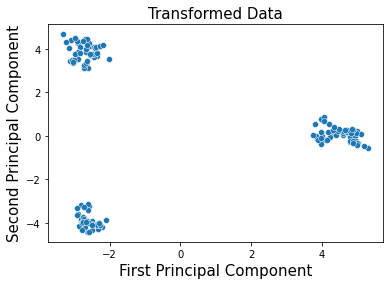

In [189]:
# Take the first and second principal components and plot a scatter plot with the labels.
sns.scatterplot(x = 'PC1', y = 'PC2', data = df_pca_2) 
#hue = df_status)

# set the plot title and axes labels
# set the text size using 'fontsize'
plt.title('Transformed Data', fontsize = 15)
plt.xlabel('First Principal Component', fontsize = 15)
plt.ylabel('Second Principal Component', fontsize = 15)
# display the plot
plt.show()

In [131]:
# Intution : The above plot shows the maximum variation in the data along the second principal component

# #PCA FOR DIMENSION REDUCTION

In [169]:
# Fit the PCA model on the data and plot a graph between n_components and cumulative explained variance.
#Applying the PCA on our DF
pca2 = PCA(n_components=72)
pc2 = pca2.fit_transform(scale)
 
#cumulative explained variance
np.cumsum(pca2.explained_variance_ratio_)

array([0.10601999, 0.19048095, 0.22935962, 0.25923007, 0.28162434,
       0.30274089, 0.32229493, 0.33995375, 0.35715629, 0.37388169,
       0.38891043, 0.40187612, 0.41416646, 0.42492797, 0.4350845 ,
       0.44417941, 0.45319145, 0.46219149, 0.47118551, 0.48014826,
       0.48910728, 0.49806174, 0.5070159 , 0.51596862, 0.52491969,
       0.53386857, 0.54281095, 0.55175037, 0.56068627, 0.56961463,
       0.57853565, 0.58745134, 0.59636009, 0.60526276, 0.61415982,
       0.62305374, 0.6319469 , 0.64083982, 0.64973275, 0.65862567,
       0.66751859, 0.67641151, 0.68530443, 0.69419736, 0.70309028,
       0.7119832 , 0.72087612, 0.72976904, 0.73866027, 0.74754322,
       0.75641925, 0.76529451, 0.77416265, 0.78302575, 0.79188503,
       0.80074037, 0.80958788, 0.81843276, 0.82727531, 0.83611569,
       0.84495473, 0.85379197, 0.86262568, 0.87145827, 0.8802904 ,
       0.88912241, 0.89795442, 0.90678643, 0.91561845, 0.92445046,
       0.93328247, 0.94211448])

In [170]:
#viewing the principal components
pc2

array([[ 4.60814591e+00,  2.44071141e-02,  7.33422018e-01, ...,
         2.43524442e-13, -1.97560013e-12,  1.16950116e-14],
       [-2.42972513e+00,  3.73866465e+00, -1.99236716e+00, ...,
         2.49051055e-13, -1.97425308e-12,  5.09248192e-15],
       [-2.60185088e+00,  3.11171241e+00,  2.92713097e+00, ...,
         1.66225262e-14, -5.88002436e-13, -1.32096509e-13],
       ...,
       [-2.18410197e+00,  4.19035210e+00,  1.50053322e+00, ...,
         1.48737903e-13,  4.68904468e-13, -3.70420215e-13],
       [-2.64375102e+00,  4.46561007e+00,  1.51809696e+00, ...,
         1.72408942e+00,  5.34249930e+00, -2.21982507e+00],
       [-2.75465977e+00,  4.38014694e+00, -1.91861746e+00, ...,
        -5.17568759e-01, -7.02236661e-01, -3.18364785e+00]])

In [171]:
# Calculate the variance explained by principle components
print('Variance of each component:', pca2.explained_variance_ratio_)
print('Cumulative Explained Variance:', round(sum(list(pca2.explained_variance_ratio_))*100, 2))

Variance of each component: [0.10601999 0.08446096 0.03887867 0.02987045 0.02239427 0.02111655
 0.01955404 0.01765881 0.01720254 0.0167254  0.01502874 0.01296569
 0.01229034 0.0107615  0.01015653 0.00909491 0.00901204 0.00900004
 0.00899402 0.00896275 0.00895902 0.00895446 0.00895415 0.00895273
 0.00895107 0.00894887 0.00894238 0.00893942 0.00893589 0.00892836
 0.00892103 0.00891568 0.00890876 0.00890267 0.00889705 0.00889392
 0.00889317 0.00889292 0.00889292 0.00889292 0.00889292 0.00889292
 0.00889292 0.00889292 0.00889292 0.00889292 0.00889292 0.00889292
 0.00889122 0.00888296 0.00887603 0.00887525 0.00886814 0.0088631
 0.00885928 0.00885534 0.00884751 0.00884488 0.00884256 0.00884037
 0.00883904 0.00883724 0.00883371 0.00883259 0.00883213 0.00883201
 0.00883201 0.00883201 0.00883201 0.00883201 0.00883201 0.00883201]
Cumulative Explained Variance: 94.21


In [172]:
for i in pca2.explained_variance_:
    var = i/sum(pca2.explained_variance_)*100
    print(var)

11.253408090929785
8.965042372150489
4.126746017219147
3.170574900317771
2.377022673992326
2.2413998405866677
2.0755481309093815
1.8743808687763392
1.825950275002157
1.7753048229185522
1.595214015402024
1.3762327058443156
1.304548612316526
1.1422712544073266
1.0780569902772805
0.9653722074480197
0.9565760931566775
0.9553017325324231
0.9546636099503897
0.9513439324906342
0.9509480304420731
0.9504645516136181
0.9504315885569969
0.9502800252456197
0.9501043392986396
0.9498710501994188
0.9491823024986117
0.9488678181988246
0.9484935407833017
0.9476939458088032
0.9469153552580385
0.946348175488309
0.9456129080715735
0.944966785970223
0.9443708115482258
0.9440380598635836
0.9439581767589151
0.943932202543654
0.9439322025436538
0.9439322025436536
0.9439322025436536
0.9439322025436536
0.9439322025436536
0.9439322025436526
0.9439322025436526
0.9439322025436526
0.9439322025436526
0.9439322025436516
0.9437519746318876
0.9428742699358222
0.9421392781194838
0.94205682600763
0.9413015038737047
0.940

Text(0, 0.5, 'Explained variance')

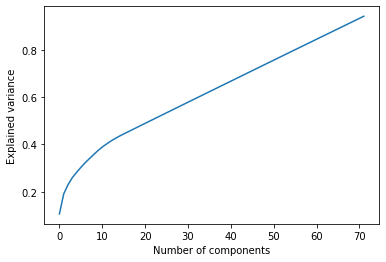

In [173]:
#plot between n_components and cumulative explained variance
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
#To show the plot
#plt.show()
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
#plt.savefig('elbow_plot.png', dpi=100)

# Q : In how many components we are getting approximately 90% of explained Variance
# Ans : In 70 components we are getting approximately 90% of explained Variance

# LDA

In [183]:
#Defining a function to test, train and predict the model on our dataset
def model_accuracy(sales, df2, test_size, random_state, model):
    X_train, X_test, Y_train, Y_test = train_test_split(sales, df2, test_size=test_size, random_state=random_state)
    model.fit(X_train, Y_train)
    X_pred = model.predict(X_test)
    print("Accuracy score for Test data: ", accuracy_score(Y_test, X_pred))

In [184]:
#Defining the LDA model with n_components = 1 and applying it to the train test data
lda = LDA(n_components = 1)
model_accuracy(sales, df_status, 0.2, 42, lda)

Accuracy score for Test data:  0.9666666666666667


In [185]:
#Defining the RandomForestClassifier model and applying it to the train test data
rfc = RandomForestClassifier()
model_accuracy(sales, df_status, 0.2, 42, rfc)

Accuracy score for Test data:  1.0
